# Miniproject 3: Poem Generation

### Download Data

In [ ]:
import requests

url_dict = {
    'shakespeare.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/shakespeare.txt',
    'spenser.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/spenser.txt',
    'syllable_dict.txt' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/Syllable_dictionary.txt',
    'about_syllable_dict.docx' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/syllable_dict_explanation.docx'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('shakespeare.txt')
download_file('spenser.txt')
download_file('syllable_dict.txt')
download_file('about_syllable_dict.docx')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


### Importing packages \& Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import os
import re
import random
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split() and len(line.split()) > 1]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [ ]:
shakespeare_poems = open('shakespeare.txt', 'r').read()

shakespeare_poems = shakespeare_poems.lower()

In [ ]:
poem_obs, poem_map = parse_observations(shakespeare_poems)

print(poem_obs)
print(poem_map)

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 10, 24, 21, 25], [13, 26, 27, 28, 29, 30, 31, 32], [33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45], [34, 46, 34, 47, 28, 34, 48, 46, 49, 50], [26, 6, 51, 52, 15, 53, 54, 55], [56, 57, 58, 28, 15, 59, 60], [61, 29, 30, 62, 63, 34, 64], [56, 22, 65, 66, 67, 68, 69], [70, 15, 71, 72, 73, 74, 75, 76], [28, 77, 15, 53, 78, 18, 15, 79, 56, 80], [81, 82, 83, 84, 85, 34, 86], [56, 87, 88, 89, 68, 34, 8, 90], [34, 91, 92, 93, 94, 95, 96, 52], [97, 76, 41, 98, 99, 100, 101, 102, 103], [104, 105, 106, 43, 107, 34, 108, 45], [43, 107, 15, 109, 100, 34, 110, 111], [28, 112, 61, 29, 30, 88, 113, 32], [114, 115, 116, 117, 56, 118, 119], [120, 121, 122, 119, 123, 34, 8, 124], [125, 26, 126, 127, 74, 128, 129, 100, 130], [84, 131, 132, 133, 56, 134, 132, 135, 136], [137, 21, 108, 18, 138, 29], [74, 114, 28, 76, 139, 140, 81, 26, 51, 135], [56, 141, 34, 142, 143, 81, 26, 144, 145, 146], [147, 68, 34, 148

In [ ]:
syllable_dict = {}

with open('syllable_dict.txt', 'r') as file:
    for line in file:
        info = line.strip().split(' ')
        info[0] = info[0].replace("'", "")
        info[0] = info[0].replace("-", "")
        syllable_dict[info[0]] = info[1:]

print(syllable_dict)

{'gainst': ['1'], 'greeing': ['E1', '2'], 'scaped': ['1'], 'tis': ['1'], 'twixt': ['1'], 'a': ['1'], 'adoting': ['E2', '3'], 'abhor': ['2'], 'abide': ['2'], 'able': ['2'], 'about': ['2'], 'above': ['2'], 'absence': ['2'], 'absent': ['2'], 'abundance': ['3'], 'abundant': ['3'], 'abuse': ['2'], 'abused': ['2'], 'abuses': ['3'], 'abysm': ['2'], 'accents': ['2'], 'acceptable': ['4'], 'acceptance': ['3'], 'accessary': ['4'], 'accident': ['3'], 'accidents': ['3'], 'account': ['2'], 'accumulate': ['4'], 'accuse': ['2'], 'accusing': ['3'], 'achieve': ['2'], 'acknowledge': ['3'], 'acquaintance': ['3'], 'acquainted': ['E2', '3'], 'act': ['1'], 'action': ['2'], 'active': ['2'], 'actor': ['2'], 'add': ['1'], 'added': ['2'], 'adders': ['2'], 'addeth': ['2'], 'adding': ['2'], 'addition': ['3'], 'adieu': ['2'], 'adjunct': ['2'], 'admire': ['2'], 'admired': ['3'], 'admiring': ['3'], 'admit': ['2'], 'admitted': ['3'], 'adonis': ['3'], 'adore': ['2'], 'adulterate': ['3'], 'advance': ['2'], 'advantage': 

In [ ]:
# Pre-processing ideas:
# Add syllable and pronunciation info
# Add indicator if at end of sentence (for rhyming)

poem_dict = []

for line in poem_obs:
  line_dict = {}
  for i in range(len(line)):
    index = line[i]
    word = str([key for key, val in poem_map.items() if val == line[i]][0])
    line_dict[word] = (poem_map[word], syllable_dict[word], 1 if i == (len(line) - 1) else 0)
  poem_dict.append(line_dict)

In [ ]:
data_rows = []
for dictionary in poem_dict:
    for info_key, info_tuple in dictionary.items():
        word, syllables, boolean_value = info_tuple
        data_rows.append({'word': info_key, 'syllables': syllables, 'endline': boolean_value, 'index': word})

df = pd.DataFrame(data_rows)

word_array = np.array(df)


In [ ]:
print(df[:40])
print(word_array)

          word syllables  endline  index
0         from       [1]        0      0
1      fairest       [2]        0      1
2    creatures       [2]        0      2
3           we       [1]        0      3
4       desire       [2]        0      4
5     increase       [2]        1      5
6         that       [1]        0      6
7      thereby       [2]        0      7
8      beautys       [2]        0      8
9         rose       [1]        0      9
10       might       [1]        0     10
11       never   [E1, 2]        0     11
12         die       [1]        1     12
13         but       [1]        0     13
14          as       [1]        0     14
15         the       [1]        0     15
16       riper       [2]        0     16
17      should       [1]        0     17
18          by       [1]        0     18
19        time       [1]        0     19
20     decease       [2]        1     20
21         his       [1]        0     21
22      tender       [2]        0     22
23        heir  

In [ ]:
rhyming_dict = {}

rhyming_lines = []

for i in range(word_array.shape[0]):
  curr_row = word_array[i]
  if curr_row[2] == 1:
    rhyming_lines.append(curr_row)

In [ ]:
print(rhyming_lines)

[array(['increase', list(['2']), 1, 5], dtype=object), array(['die', list(['1']), 1, 12], dtype=object), array(['decease', list(['2']), 1, 20], dtype=object), array(['memory', list(['3']), 1, 25], dtype=object), array(['eyes', list(['1']), 1, 32], dtype=object), array(['fuel', list(['1']), 1, 39], dtype=object), array(['lies', list(['1']), 1, 45], dtype=object), array(['cruel', list(['E1', '2']), 1, 50], dtype=object), array(['ornament', list(['3']), 1, 55], dtype=object), array(['spring', list(['1']), 1, 60], dtype=object), array(['content', list(['2']), 1, 64], dtype=object), array(['niggarding', list(['3']), 1, 69], dtype=object), array(['be', list(['1']), 1, 76], dtype=object), array(['thee', list(['1']), 1, 80], dtype=object), array(['brow', list(['1']), 1, 86], dtype=object), array(['field', list(['1']), 1, 90], dtype=object), array(['now', list(['1']), 1, 52], dtype=object), array(['held', list(['1']), 1, 103], dtype=object), array(['lies', list(['1']), 1, 45], dtype=object), ar

In [ ]:
rhyming_dict = {}

for i in range(0, len(rhyming_lines) - 13, 14):
  n = i
  for k in range(n, n + 12, 4):
    first_word = rhyming_lines[k][0]
    second_word = rhyming_lines[k + 1][0]
    if first_word in rhyming_dict.keys():
      rhyming_dict[first_word].append(rhyming_lines[k + 2][0])
    else:
      rhyming_dict[first_word] = [rhyming_lines[k + 2][0]]

    if second_word in rhyming_dict.keys():
      rhyming_dict[second_word].append(rhyming_lines[k + 3][0])
    else:
      rhyming_dict[second_word] = [rhyming_lines[k + 3][0]]

  last_rhyme = rhyming_lines[n + 12][0]
  if last_rhyme in rhyming_dict.keys():
    rhyming_dict[last_rhyme].append(rhyming_lines[n + 13][0])
  else:
    rhyming_dict[last_rhyme] = [rhyming_lines[n + 13][0]]

In [ ]:
for key in rhyming_dict.keys():
  rhyming_dict[key] = list(set(rhyming_dict[key]))

# Implementing Models

## HMM Code

In [ ]:
# You can use this skeleton code to complete the HMM
# implementation of set 5.
#
# Some pointers to get you started:
#
#     - Choose your notation carefully and consistently! Readable
#       notation will make all the difference in the time it takes you
#       to implement this class, as well as how difficult it is to debug.
#
#     - Read the documentation in this file! Make sure you know what
#       is expected from each function and what each variable is.
#
#     - Any reference to "the (i, j)^th" element of a matrix T means that
#       you should use T[i][j].
#
#     - Note that in our solution code, no NumPy was used. That is, there
#       are no fancy tricks here, just basic coding. If you understand HMMs
#       to a thorough extent, the rest of this implementation should come
#       naturally. However, if you'd like to use NumPy, feel free to.
#
#     - Take one step at a time! Move onto the next algorithm to implement
#       only if you're absolutely sure that all previous algorithms are
#       correct. We are providing you waypoints for this reason.
#
# To get started, just fill in code where indicated. Best of luck!

class HiddenMarkovModel:
    '''
    Class implementation of Hidden Markov Models.
    '''

    def __init__(self, A, O):
        '''
        Initializes an HMM. Assumes the following:
            - States and observations are integers starting from 0.
            - There is a start state (see notes on A_start below). There
              is no integer associated with the start state, only
              probabilities in the vector A_start.
            - There is no end state.
        Arguments:
            A:          Transition matrix with dimensions L x L.
                        The (i, j)^th element is the probability of
                        transitioning from state i to state j. Note that
                        this does not include the starting probabilities.
            O:          Observation matrix with dimensions L x D.
                        The (i, j)^th element is the probability of
                        emitting observation j given state i.
        Parameters:
            L:          Number of states.

            D:          Number of observations.

            A:          The transition matrix.

            O:          The observation matrix.

            A_start:    Starting transition probabilities. The i^th element
                        is the probability of transitioning from the start
                        state to state i. For simplicity, we assume that
                        this distribution is uniform.
        '''

        self.L = len(A)
        self.D = len(O[0])
        self.A = A
        self.O = O
        self.A_start = [1. / self.L for _ in range(self.L)]


    def viterbi(self, x):
        '''
        Uses the Viterbi algorithm to find the max probability state
        sequence corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            max_seq:    State sequence corresponding to x with the highest
                        probability.
        '''

        M = len(x)      # Length of sequence.

        # The (i, j)^th elements of probs and seqs are the max probability
        # of the prefix of length i ending in state j and the prefix
        # that gives this probability, respectively.
        #
        # For instance, probs[1][0] is the probability of the prefix of
        # length 1 ending in state 0.
        probs = [[0. for _ in range(self.L)] for _ in range(M + 1)]
        seqs = [['' for _ in range(self.L)] for _ in range(M + 1)]

        for i in range(1, M+1):
          for n in range(self.L):
            if i == 1:
              probs[i][n] = self.A_start[n] * self.O[n][x[i-1]]
              seqs[i][n] = str(n)
            else:
              max_p = 0
              seq = ''
              for p in range(self.L):
                curr_prob = probs[i - 1][p] * self.A[p][n] * self.O[n][x[i - 1]]
                if curr_prob > max_p:
                  max_p = curr_prob
                  seq = seqs[i - 1][p] + str(n)
              probs[i][n] = max_p
              seqs[i][n] = seq

        max_seq = seqs[M][probs[M].index(max(probs[M]))]
        return max_seq


    def forward(self, x, normalize=False):
        '''
        Uses the forward algorithm to calculate the alpha probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            alphas:     Vector of alphas.
                        The (i, j)^th element of alphas is alpha_j(i),
                        i.e. the probability of observing prefix x^1:i
                        and state y^i = j.
                        e.g. alphas[1][0] corresponds to the probability
                        of observing x^1:1, i.e. the first observation,
                        given that y^1 = 0, i.e. the first state is 0.
        '''

        M = len(x)      # Length of sequence.
        alphas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        for i in range(1, M+1):
          for n in range(self.L):
            if i == 1:
              alphas[i][n] = self.A_start[n] * self.O[n][x[i-1]]
            else:
              alphas[i][n] = self.O[n][x[i - 1]] * sum(alphas[i - 1][p] * self.A[p][n] for p in range(self.L))
          if normalize:
            alphas[i] = list(np.array(alphas[i]) / np.sum(alphas[i]))

        return alphas



    def backward(self, x, normalize=False):
        '''
        Uses the backward algorithm to calculate the beta probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            betas:      Vector of betas.
                        The (i, j)^th element of betas is beta_j(i), i.e.
                        the probability of observing prefix x^(i+1):M and
                        state y^i = j.
                        e.g. betas[M][0] corresponds to the probability
                        of observing x^M+1:M, i.e. no observations,
                        given that y^M = 0, i.e. the last state is 0.
        '''

        M = len(x)      # Length of sequence.
        betas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        for i in range(M, 0, -1):
          for n in range(self.L):
            if i == M:
              betas[i][n] = 1
            else:
              betas[i][n] = sum([self.A[n][p] * self.O[p][x[i]] * betas[i + 1][p] for p in range(self.L)])

          if normalize:
            betas[i] = list(np.array(betas[i]) / np.sum(betas[i]))

        return betas


    def supervised_learning(self, X, Y):
        '''
        Trains the HMM using the Maximum Likelihood closed form solutions
        for the transition and observation matrices on a labeled
        datset (X, Y). Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to D - 1. In other words, a list of
                        lists.
            Y:          A dataset consisting of state sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to L - 1. In other words, a list of
                        lists.
                        Note that the elements in X line up with those in Y.
        '''

        # Calculate each element of A using the M-step formulas.

        for i in range(self.L):
          for n in range(self.L):
            num = 0
            denom = 0
            for l in Y:
              for p in range(1, len(l)):
                if l[p - 1] == i:
                  denom += 1
                  if l[p] == n:
                    num += 1

            self.A[i][n] = num / denom

        # Calculate each element of O using the M-step formulas.

        for i in range(self.L):
          for n in range(self.D):
            num = 0
            denom = 0
            for m in range(len(X)):
              curr_x = X[m]
              curr_y = Y[m]
              for p in range(len(curr_y)):
                if curr_y[p] == i:
                  denom += 1
                  if curr_x[p] == n:
                    num += 1

            self.O[i][n] = num / denom


    def unsupervised_learning(self, X, N_iters):
        '''
        Trains the HMM using the Baum-Welch algorithm on an unlabeled
        datset X. Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of variable-length lists, consisting of integers
                        ranging from 0 to D - 1. In other words, a list of
                        lists.
            N_iters:    The number of iterations to train on.
        '''

        for i in range(N_iters):
          O = np.zeros((self.L, self.D))
          A = np.zeros((self.L, self.L))
          for x in X:
            alphas = self.forward(x, normalize = True)
            betas = self.backward(x, normalize = True)
            for n in range(1, len(x) + 1):
              marginal_1 = [alphas[n][p] * betas[n][p] for p in range(self.L)]
              marginal_1 /= sum(marginal_1)
              marginal_1 = marginal_1[:, np.newaxis]
              O[:, x[n-1]] += marginal_1.flatten()
              if n < len(x):
                marginal_2 = np.array([[alphas[n][j] * self.A[j][p] * self.O[p][x[n]] * betas[n+1][p] for p in range(self.L)] for j in range(self.L)])
                marginal_2 /= np.sum(marginal_2)
                A += marginal_2

          self.A = A / A.sum(axis=1, keepdims=True)
          self.O = O / O.sum(axis=1, keepdims=True)


    def generate_emission(self, M, seed=None):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random.
        Arguments:
            M:          Length of the emission to generate.
        Returns:
            emission:   The randomly generated emission as a list.
            states:     The randomly generated states as a list.
        '''

        # (Re-)Initialize random number generator
        rng = np.random.default_rng(seed=seed)

        emission = []
        states = []

        curr = rng.choice(range(self.L))
        for i in range(M):
          states.append(curr)
          emission.append(rng.choice(range(self.D), p = self.O[curr]))
          curr = rng.choice(range(self.L), p = self.A[curr])

        return emission, states

    def predict_state(self, word_state):
        dist = [state[word_state] for state in self.O]
        return dist.index(max(dist))


    def generate_rhyming_emission(self, syllable_dict, word_state):
        emission = []
        states = []

        reversed_poem_map = {value: key for key, value in poem_map.items()}

        state = self.predict_state(word_state)
        states.append(state)
        emission.append(word_state)

        syllable_count = 0
        syllable_count += count_syllables(reversed_poem_map[word_state], syllable_dict)

        while syllable_count < 10:
          word = np.random.choice(range(self.D), p = self.O[state])
          curr_count = count_syllables(reversed_poem_map[word], syllable_dict)
          if syllable_count + curr_count <= 10:
            syllable_count += curr_count

            state = np.random.choice(range(self.L), p = self.A[state])
            emission.append(word)
            states.append(state)


        emission.reverse()
        states.reverse()
        return emission, states




    def probability_alphas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the forward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        # Calculate alpha vectors.
        alphas = self.forward(x)

        # alpha_j(M) gives the probability that the state sequence ends
        # in j. Summing this value over all possible states j gives the
        # total probability of x paired with any state sequence, i.e.
        # the probability of x.
        prob = sum(alphas[-1])
        return prob


    def probability_betas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the backward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        betas = self.backward(x)

        # beta_j(1) gives the probability that the state sequence starts
        # with j. Summing this, multiplied by the starting transition
        # probability and the observation probability, over all states
        # gives the total probability of x paired with any state
        # sequence, i.e. the probability of x.
        prob = sum([betas[1][j] * self.A_start[j] * self.O[j][x[0]] \
                    for j in range(self.L)])

        return prob


def supervised_HMM(X, Y):
    '''
    Helper function to train a supervised HMM. The function determines the
    number of unique states and observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for supervised learning.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        Y:          A dataset consisting of state sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to L - 1. In other words, a list of lists.
                    Note that the elements in X line up with those in Y.
    '''
    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Make a set of states.
    states = set()
    for y in Y:
        states |= set(y)

    # Compute L and D.
    L = len(states)
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[random.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[random.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with labeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.supervised_learning(X, Y)

    return HMM

def unsupervised_HMM(X, n_states, N_iters, seed=None):
    '''
    Helper function to train an unsupervised HMM. The function determines the
    number of unique observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for unsupervised learing.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        n_states:   Number of hidden states to use in training.

        N_iters:    The number of iterations to train on.
        rng:        The random number generator for reproducible result.
                    Default to RandomState(1).
    '''
    # Initialize random number generator
    rng = np.random.default_rng(seed=seed)

    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Compute L and D.
    L = n_states
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[rng.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[rng.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with unlabeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.unsupervised_learning(X, N_iters)

    return HMM

In [ ]:
def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r:d-r, -r:d-r]
    circle = (x**2 + y**2 <= r**2)

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask

def text_to_wordcloud(text, max_words=50, title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud

def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = []

    top10_freq = {}

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    sentence_str_acc = []
    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)
        sentence_str_acc.append(sentence_str)

        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    for i in range(n_states):
      # Process text and sort the dictionary in one line
      word_freq = {k: v for k, v in sorted(wordclouds[i].process_text(sentence_str_acc[i]).items(), key=lambda item: item[1], reverse=True)}
      top10_freq[f'State {i}'] = list(word_freq)[:10]

    return wordclouds, top10_freq


####################
# HMM FUNCTIONS
####################

def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100, seed=None):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words, seed=seed)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize() + '...'


####################
# HMM VISUALIZATION FUNCTIONS
####################

def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()


####################
# HMM ANIMATION FUNCTIONS
####################

def animate_emission(hmm, obs_map, M=8, height=12, width=12, delay=1, seed=None):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06

    # Initialize.
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = states_to_wordclouds(hmm, obs_map, max_words=20, show=False)

    # Initialize plot.
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)

    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)

            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

    emission, states = hmm.generate_emission(M, seed=seed)

    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm.A[states[0]][states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm.A[states[i - 2]][states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map_r[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]

    # Animate!
    print('\nAnimating...')
    anim = FuncAnimation(fig, animate, frames=M+delay, interval=1000)

    return anim


In [ ]:
def count_syllables(line, syllable_dict):
  words = line.split(" ")
  # print(line)
  syllable_count = 0
  for i in range(len(words)):
    curr_word = words[i].lower()
    # print(syllable_dict[curr_word])
    syllables = syllable_dict[curr_word]
    # print(curr_word)
    # print(syllables)
    if len(syllables) == 1:
      syllable_count += int(syllables[0])
    if len(syllables) > 1:
      if i == len(words) - 1:
        if syllables[0].isdigit():
          syllable_count += int(syllables[0])
        else:
          syllable_count += int(syllables[0][1])
      else:
        for syllable in syllables:
          if syllable.isdigit():
            syllable_count += int(syllable)
            break

  return syllable_count


def naive_sonnet_hmm(hmm, obs_map, syllable_dict):
  sonnet = ''
  for line in range(14):
    if line % 4 == 0:
      sonnet += ("\n")
    n = np.random.choice(range(5, 8))
    # print(n)
    new_line = sample_sentence(hmm, obs_map, n_words = n)
    new_line = new_line.replace(".", "")
    while(count_syllables(new_line, syllable_dict) != 10):
      # print(count_syllables(new_line, syllable_dict))
      new_line = sample_sentence(hmm, obs_map, n_words = np.random.choice(range(5, 8)))
      new_line = new_line.replace(".", "")


    sonnet += new_line + "\n"

  return sonnet

In [ ]:
hmm = unsupervised_HMM(poem_obs, 4, 100, seed=123)

In [ ]:
print(naive_sonnet_hmm(hmm, poem_map, syllable_dict))


I although befriends to care away the
I live deserved and tyrants than truly
Purpose stage eye any remembrance other
Mine the other that alone shame beautys

On hue posterity presence love the
Liberty sum sweet and hunted commits
O makeless and wantonly my though on
Imitate ere of traffic all thee haste

Victories rehearse must worth that face on
Doth proceed closure bower first doom tender
Meditation doth to whole the thou that
Faith much offenders music depart eyes

Thy them alloblivious my a thee true
Do true and spacious blessed eyes thy



In [ ]:
hmm_nonreverse_15 = unsupervised_HMM(poem_obs, 15, 100, seed=123)

In [ ]:
print(naive_sonnet_hmm(hmm_nonreverse_15, poem_map, syllable_dict))


Truly bevel thyself that wound as eyes
Love costly boy of break numbers siren
Indirectly like my feeling fresh their
Hiding earth drinks away unfair well thou

Of prisoner evil away his theres no
Enough being eyes down pitiful hate in
Men by embassage gentle to winters
All happy threescore beautys son workings

That put graven from aside tallies my
Abundance to come dwellers hands rose for
Winter him i oerread make votary
Surfeit for remembered love my lines that

Thy salutation thou in the nor other
If nature were shalt i eternity



In [ ]:
# Making reversed observation list for rhyming hmm
# The emissions are reversed when generating rhyme
# so reversing the observations should create
# transition matrices that are reversed/ backwards
# so when we make emissions based on reversed transitions
# reversing the emission will un-reverse the transitions
# and hopefully make more sense

copied_list = [lst.copy() for lst in poem_obs]

test_poem_obs = [lst[::-1] for lst in copied_list]

In [ ]:
hmm_1 = unsupervised_HMM(test_poem_obs, 4, 100, seed=123)

In [ ]:
print(naive_sonnet_hmm(hmm_1, poem_map, syllable_dict))


Treason evermore either that art stays what
Beck amazeth me honour enlighten
That from with you you effectually whats
Unhappily being o for to it in

Groan situation straight will adore me
Lo remembered it and errors yellow
Wife ransom glory rudely dost least blood
Disabled is making tempteth needs

Releasing time self my in folly making
Memory my is decay renew thee
Fragrant as should do grown oercharged basest
Prefiguring sight aside leisure scythe

His to wouldst without sovereign wonder heat
Manners thought pity nothing be dost see



In [ ]:
hmm_15 = unsupervised_HMM(test_poem_obs, 15, 100, seed=123)

In [ ]:
print(naive_sonnet_hmm(hmm_15, poem_map, syllable_dict))


Do accident heart stormbeaten thy brass
To large unperfect and loving gentle
Doubt is eyes resembling to doubting as
I strangely though buried i poets youth

Quick but apparel my saw less heavy
Injurious if it unused and be grows
Book not into the random with oertake
Perceived desire gave by upon the masked

Flame although out good forbear painters my
Lamb am two hugely pass spending torture
Had argument the for even among whilst
Alone be stronger eithers with see show

Recounting and ere wound know lacking the
Invent world flowers may whateer answers it



## RNN Code

In [ ]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [ ]:
def one_hot_encoding(x, chars, char_seq_len):
  features = np.zeros((len(x), char_seq_len, len(chars)), dtype=np.float32)
  for i in range(len(x)):
    for j in range(char_seq_len):
      features[i, j, x[i][j]] = 1
  return features

In [ ]:
def rnn_data(poem_map, poem_obs):
  reversed_poem_map = {value: key for key, value in poem_map.items()}

  new_poem_map = {" ": 0, "\n": 1}
  new_poem_obs = []
  counter = 2

  for line in poem_obs:
    for n in range(len(line)):
      word = reversed_poem_map[line[n]]
      for i in range(len(word)):
        char = word[i]
        if char not in new_poem_map:
          new_poem_map[char] = counter
          counter += 1
        new_poem_obs.append(new_poem_map[char])
      if n != len(line) - 1:
        new_poem_obs.append(new_poem_map[" "])
      else:
        new_poem_obs.append(new_poem_map["\n"])

  x = []
  y = []

  for i in range(0, len(new_poem_obs) - 40, 4):
    x.append(new_poem_obs[i: i + 40])
    y.append(new_poem_obs[i + 1: i + 41])

  x = one_hot_encoding(x, new_poem_map, 40)
  return x, y, new_poem_obs, new_poem_map

In [ ]:
x_train, y_train, nn_obs, nn_map = rnn_data(poem_map, poem_obs)
generating_map = obs_map_reverser(nn_map)

torch_x = torch.from_numpy(np.array(x_train))
torch_y = torch.from_numpy(np.array(y_train))

In [ ]:
class CharLSTM(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    super(CharLSTM, self).__init__()
    self.hidden_size = hidden_size
    self.LSTM_layer = nn.LSTM(input_size, hidden_size, 1, batch_first=True)
    self.last_layer = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=-1)

  def init_hidden(self, batch_size):
    hidden = (torch.zeros(1, batch_size, self.hidden_size, dtype=torch.float32), torch.zeros(1, batch_size, self.hidden_size, dtype=torch.float32))
    return hidden

  def forward(self, x):
    hidden = self.init_hidden(x.size(0))
    lstm_output, hidden = self.LSTM_layer(x, hidden)
    flat_output = lstm_output.contiguous().view(-1, self.hidden_size)
    last_output = self.last_layer(flat_output)
    final_output = self.softmax(last_output)
    return final_output, hidden

In [ ]:
def predict(model, char, temp):
  char = np.array([[nn_map[c] for c in char]])
  char = one_hot_encoding(char, nn_map, char.shape[1])

  char_tensor = torch.from_numpy(char)

  output, hidden = model(char_tensor)

  probability = nn.functional.softmax(output[-1], dim = 0).data.numpy()
  probability = np.exp(np.log(probability) / temp)
  probability /= np.sum(probability / temp)

  next_index = random.choices(list(range(len(generating_map))), weights = probability)

  return generating_map[next_index[0]], hidden

def gen_poem(model, out_len, temp, start="shall i compare thee to a summers day\n"):
  model.eval()
  characters = [char for char in start]
  desired_length = out_len - len(characters)
  for i in range(0, desired_length):
      output, hidden = predict(model, characters, temp)
      characters.append(output)

  return ''.join(characters)

In [ ]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
model = CharLSTM(input_size = len(nn_map), output_size = len(nn_map), hidden_size = 100)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
from torch.utils.data import DataLoader

traindata = torch.utils.data.TensorDataset(torch_x, torch_y)
train_loader = DataLoader(traindata, batch_size=500, shuffle=True)


start = time.time()
all_losses = []

for epoch in range(1, 101):
    train_loss = 0
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output, hidden = model(data)
        output = output.view(-1, len(nn_map))
        target = target.view(-1)
        loss = criterion(output, target)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    all_losses.append(train_loss)

    print("\nEPOCH {}: Loss = {:.4f}".format(epoch, loss.item()))

    if(epoch % 5 == 0):
      print(f'\nTime Elapsed: {timeSince(start)}')
      print("\n\nTemperature = 1:")
      # 14 lines * 7 words/line (gets you approx. 10 syllables) * 5 chars/word = 490 chars
      print(gen_poem(model, 490, temp = 1))
      print("\n\nTemperature = 1.5:")
      print(gen_poem(model, 490, temp=1.5))
      print("\n\nTemperature = 0.75:")
      print(gen_poem(model, 490, temp=0.75))
      print("\n\nTemperature = 0.25:")
      print(gen_poem(model, 490, temp=0.25))


EPOCH 1: Loss = 1.3023

EPOCH 2: Loss = 1.2738

EPOCH 3: Loss = 1.2491

EPOCH 4: Loss = 1.2380

EPOCH 5: Loss = 1.2314

Time Elapsed: 1m 30s


Temperature = 1:
shall i compare thee to a summers day
appears
and lover minded beauty wouldst his but excuse but bear
when can verselv of that waster chele
that give he shall los
you shall sick this thou canst thou dads to me then in thee
and there
and all wirty grows of more
and days destre see
now were grown with heat new not green
the joy do his loved
that presents thee against thou my heart that by all
mine eyes consoar stobe i see that his cantingh do in some in every being
that is any skill in m


Temperature = 1.5:
shall i compare thee to a summers day
thry will of all vayss basons day
tre mineness old hath hull meings in abuss
perieact scorty
ailed tuath sbobe thy uwured
abveltchacidg no crook
earing speason wheretyrest
anings in thine your shadom
i moy vaolyers part
or you
nor disgraceshs on play nimben welding die in liwer in bore me

## Additional Goal

In [ ]:
# Rhyming incorporated into our HMM

def sample_rhyming_couplet(hmm, poem_map, syllable_dict, rhyming_dict):
  correct_grammar_map = obs_map_reverser(poem_map)

  rhyming_words = [random.choice(list(rhyming_dict.keys()))]
  rhyming_words.append(random.choice(rhyming_dict[rhyming_words[0]]))

  rhyming_couplet = []
  for word in rhyming_words:
    word_state = poem_map[word]
    emission, states = hmm.generate_rhyming_emission(syllable_dict, word_state)
    sentence = [correct_grammar_map[i] for i in emission]
    sentence = ' '.join(sentence)
    rhyming_couplet.append(sentence)


  return rhyming_couplet

In [ ]:
def generate_quatrain(hmm, poem_map, syllable_dict, rhyming_dict):
  first = sample_rhyming_couplet(hmm, poem_map, syllable_dict, rhyming_dict)
  second = sample_rhyming_couplet(hmm, poem_map, syllable_dict, rhyming_dict)

  quatrain = ""

  quatrain += first[0] + "\n"
  quatrain += second[0] + "\n"
  quatrain += first[1] + "\n"
  quatrain += second[1] + "\n"

  return quatrain

def generate_rhyming_sonnet(hmm, poem_map, syllable_dict, rhyming_dict):
  sonnet = ""
  for i in range(3):
    sonnet += generate_quatrain(hmm, poem_map, syllable_dict, rhyming_dict) + "\n"

  couplet = sample_rhyming_couplet(hmm, poem_map, syllable_dict, rhyming_dict)

  for line in couplet:
    sonnet += line + "\n"

  return sonnet

In [ ]:
#Helper Function Created to Format the Sonnet Better
def format_sonnet(sonnet):
  lines = sonnet.split('\n')

  cap_lines = []

  for line in lines:
    cap_line = line.capitalize()

    words = list(cap_line.split(" "))
    for i in range(0, len(words)):
      if(words[i] == 'i' or words[i] == 'o'):
        words[i] = words[i].capitalize()

    cap_line = " ".join(words)

    cap_lines.append(cap_line)

  cap_sonnet = '\n'.join(cap_lines)

  stanzas = cap_sonnet.split('\n\n')
  for i in range(len(stanzas)):
    stanzas[i] = stanzas[i].strip() + '.'

  period_sonnet = '\n\n'.join(stanzas)
  return period_sonnet

In [ ]:
sonnet = generate_rhyming_sonnet(hmm, poem_map, syllable_dict, rhyming_dict)
print(format_sonnet(sonnet))

They in lip of mother doth to his was age
My she excuse now in brings to then pry
Report the accents my from pilgrimage
In eye when more not this times jealousy.

Moon wrought determination that thee mind
Are where cloak reckon all vowed and respect
Their power art wealth their not more care behind
From none strife lip by thou from their effect.

In thy beautys than my thy time thy will
Beauty that the garments bearing hand the hide
Where thou let sound argument be fulfil
Of muse idly which I invention pride.

With I so rich ages more give allow
Eyes woos I mortal too exceeds she tongue.


In [ ]:
sonnet = generate_rhyming_sonnet(hmm_1, poem_map, syllable_dict, rhyming_dict)
print(format_sonnet(sonnet))

I to and a thee what though betwixt any
Thoughts those hath been brought the all fawn brow moan
That a due the becomes he then not many
Chase we in his is eternal stay gone.

Mine against am all though gilded sight fiend
Yet not that a therefore then the think tired
My that only separable mud threw
O or their epitaph fester expired.

Before flesh live cure fear be night arrest
Thou in as they is those ruminate strive
Me haply be such firm thee hide interest
Time must sorrow world that thou style dost alive.

Put mine once friend swallowed disgrace devised
Foul which have which turned exceed sympathized.


In [ ]:
sonnet1 = generate_rhyming_sonnet(hmm_nonreverse_15, poem_map, syllable_dict, rhyming_dict)
print(format_sonnet(sonnet1))

He woe brain eternal your they disgrace
Day is heart war self me stops who been smell
Sometime besiege are small own not shall well
Old now when would by from others from tell.

New compare the these heavy joy to you
Although remain art in me years thee most
Of seem another best his night that thy new
Of and virtuous of song hath one as lost.

To the the him you my our monuments
Work by in overturn leave flowers never foiled
You wastes so whose worldwithoutend contents
So of doth nothing to yet bootless cease toiled.

He unused lose thou then thee me nor kill
Hymns offence thy stands the golden dearly treasure.


In [ ]:
sonnet2 = generate_rhyming_sonnet(hmm_15, poem_map, syllable_dict, rhyming_dict)
print(format_sonnet(sonnet2))

I how yet me to in any madness sake
And thou excuse nor them I can strive fiend
Partly sorrow away any sight with in come
Sullen eyes hope one fall rudely carved threw.

Onset not worth I thee I for woe loving
Transfix my love of holds world bred favour story
Did glorious lose never nourished who reproving
The which it impair together other glory.

This enough nor to to my beauties tongue
In quest what behold me hush fast ruth you
The nought did heat thee for love stained unjust
Seconds the death pluck after but within.

Well to from thy rhyme is uprear untrue
Tie not tongue catch due spites the smell flattery.


## Visualization

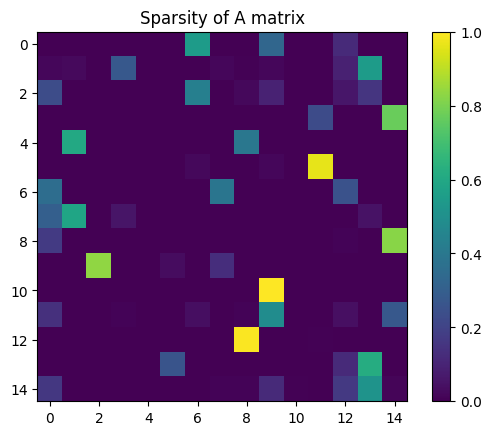

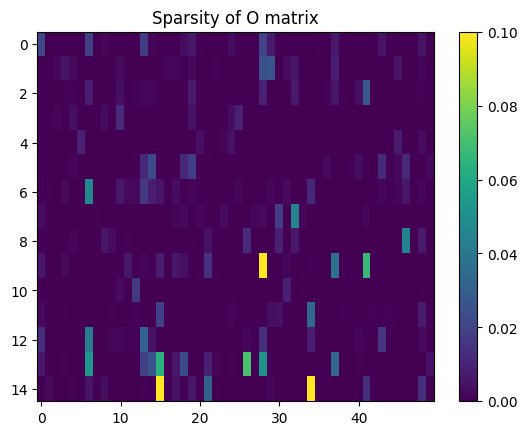

In [ ]:
visualize_sparsities(hmm_15, O_max_cols = 50)

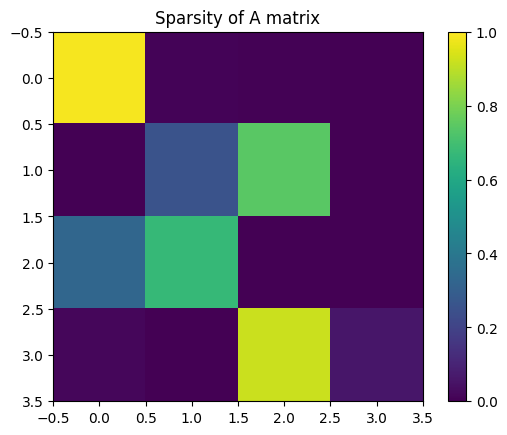

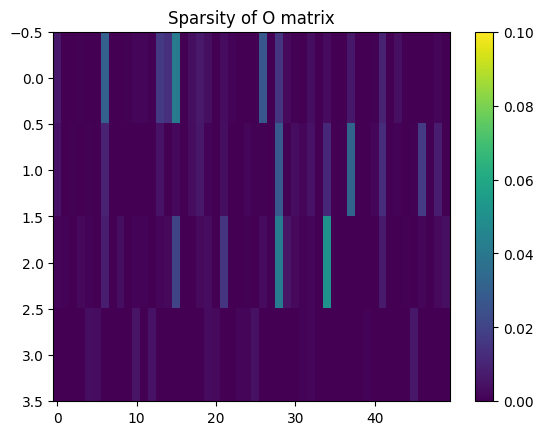

In [ ]:
visualize_sparsities(hmm_1, O_max_cols = 50)

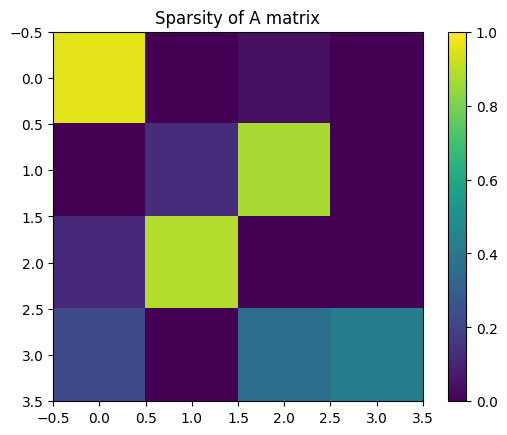

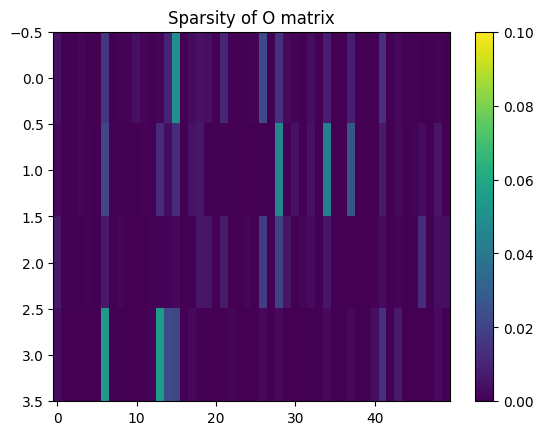

In [ ]:
visualize_sparsities(hmm, O_max_cols = 50)

In [ ]:
hmm_10 = unsupervised_HMM(poem_obs, 10, 100, seed=123)

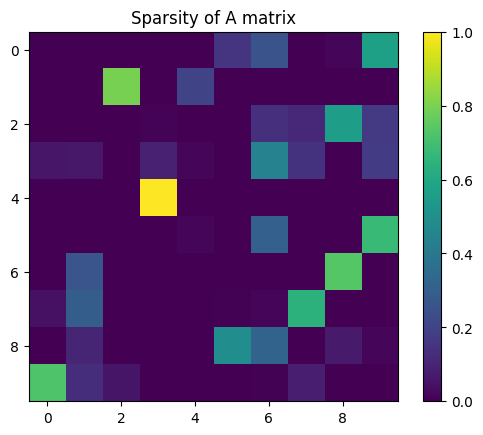

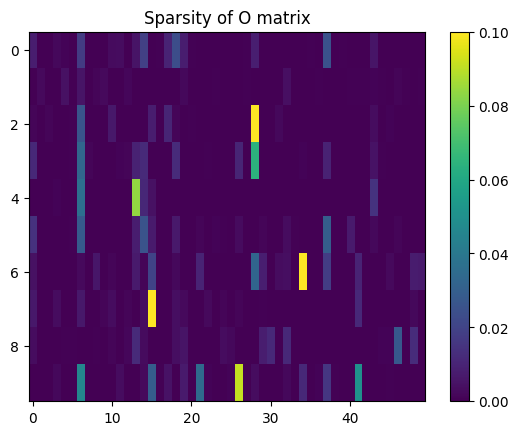

In [ ]:
visualize_sparsities(hmm_10, O_max_cols = 50)

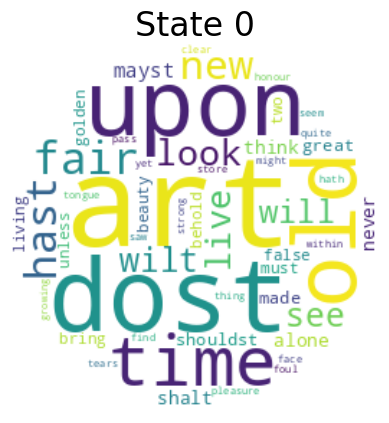

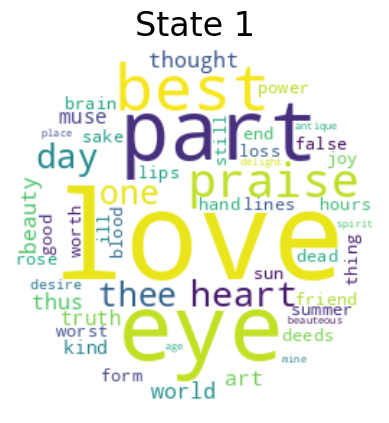

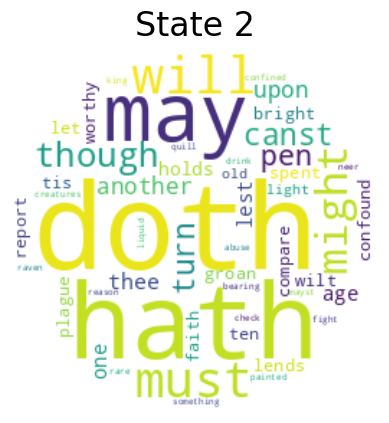

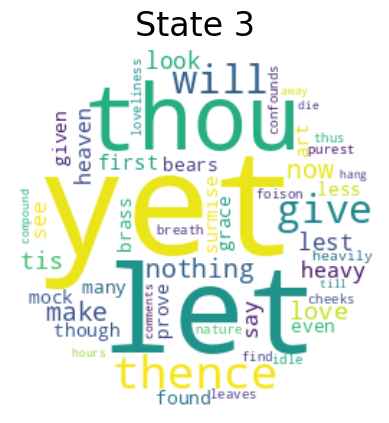

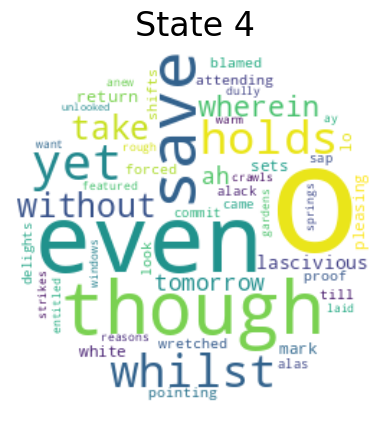

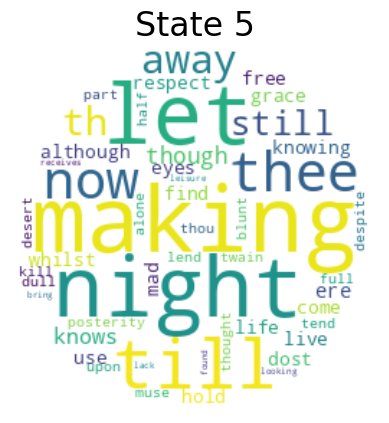

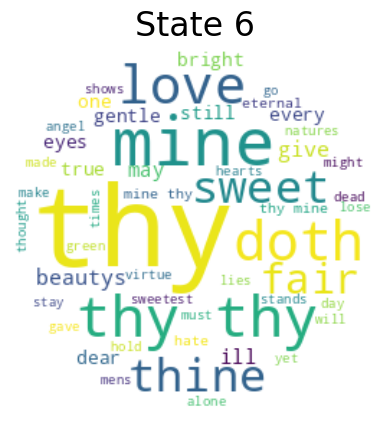

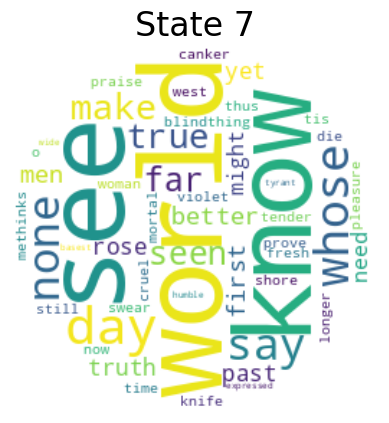

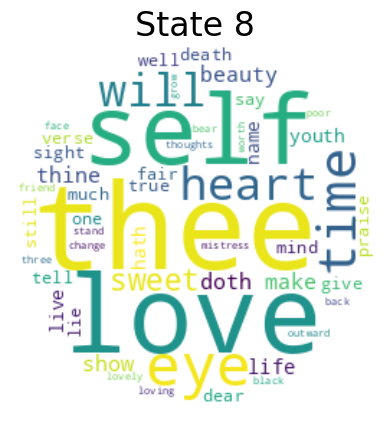

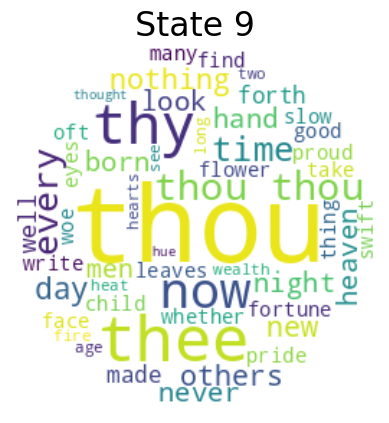

In [ ]:
wordclouds, top10_words = states_to_wordclouds(hmm_10, poem_map)

In [ ]:
for state, words in top10_words.items():
  print(f'{state}: {words}')

State 0: ['art', 'dost', 'upon', 'time', 'fair', 'hast', 'live', 'old', 'look', 'see']
State 1: ['love', 'eye', 'part', 'beauty', 'praise', 'best', 'heart', 'day', 'thee', 'one']
State 2: ['doth', 'hath', 'may', 'will', 'though', 'must', 'might', 'another', 'turn', 'upon']
State 3: ['yet', 'thou', 'make', 'let', 'now', 'will', 'give', 'love', 'many', 'say']
State 4: ['o', 'even', 'though', 'want', 'ah', 'take', 'whilst', 'yet', 'save', 'mark']
State 5: ['let', 'making', 'night', 'till', 'thee', 'th', 'still', 'away', 'now', 'knows']
State 6: ['thy', 'mine', 'doth', 'love', 'thy thy', 'sweet', 'thine', 'fair', 'beautys', 'ill']
State 7: ['say', 'world', 'know', 'far', 'whose', 'see', 'day', 'seen', 'make', 'men']
State 8: ['thee', 'love', 'self', 'eye', 'heart', 'time', 'beauty', 'sweet', 'doth', 'will']
State 9: ['thou', 'thee', 'thy', 'now', 'thou thou', 'every', 'time', 'day', 'others', 'hand']



Animating...


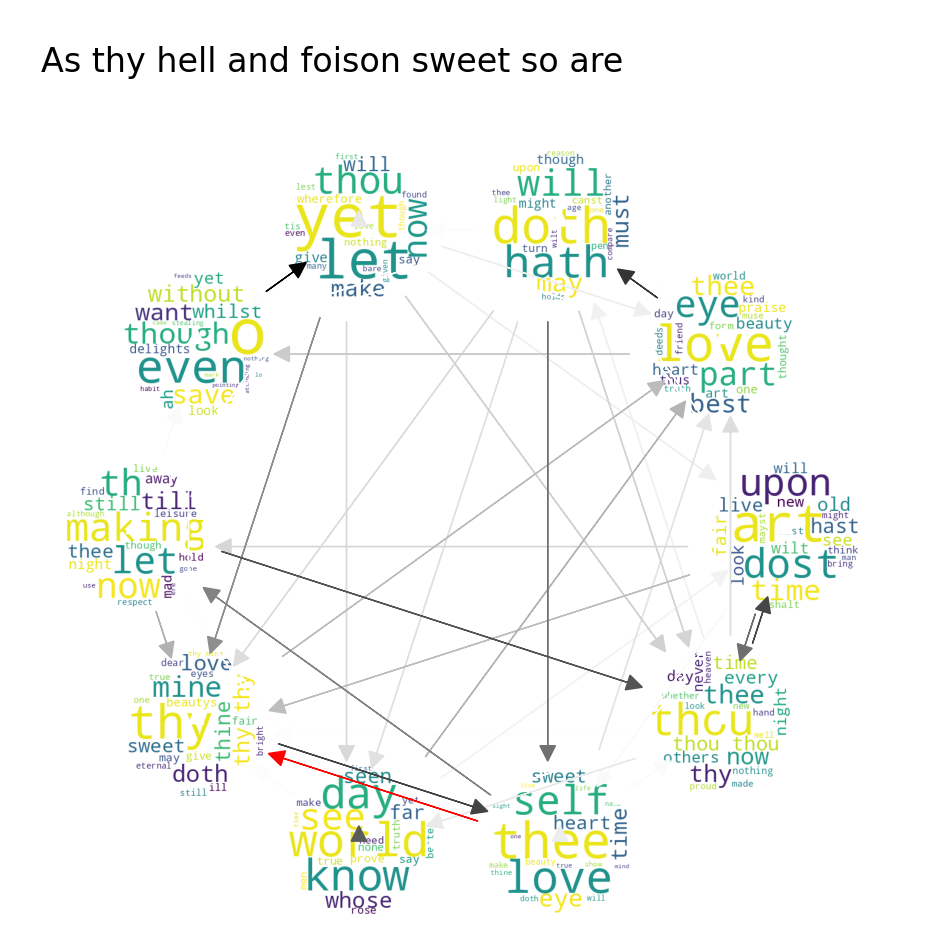

In [ ]:
from IPython.display import HTML
anim = animate_emission(hmm_10, poem_map, M=8, seed=123)
HTML(anim.to_html5_video())